In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import scipy.sparse as spa
import scipy.sparse.linalg as spalin
from tqdm import trange
import matplotlib.colors as mcolors
import imageio
import sys
sys.path.append("..")
from spatial_ultis import *

In [2]:
#定义网络参数
T, t_step, record_step = 20, 100, 10

rescale = 500
N_E, N_I = 4000, 1000
conn_NEE, conn_NIE, conn_NEI, conn_NII = 400, 100, 400, 100
J_EE, J_IE, J_EI, J_II = 4/rescale, 4/rescale, -20/rescale, -20/rescale
sigma_EE, sigma_IE, sigma_EI, sigma_II = 0,0,0,0 #8/rescale, 8/rescale, 20/rescale, 20/rescale
d_EE, d_IE, d_EI, d_II = 0.05, 0.05, 0.1, 0.1
params = Network_Params(N_E = N_E, N_I = N_I,
    N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
    d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
    g_bar_EE = J_EE * conn_NEE, g_bar_EI = J_EI * conn_NEI, g_bar_IE = J_IE * conn_NIE, g_bar_II = J_II * conn_NII,
    g_EE = sigma_EE * np.sqrt(conn_NEE), g_EI = sigma_EI * np.sqrt(conn_NEI), g_IE = sigma_IE * np.sqrt(conn_NIE), g_II = sigma_II * np.sqrt(conn_NII)
    )

Text(0, 0.5, 'Neurons')

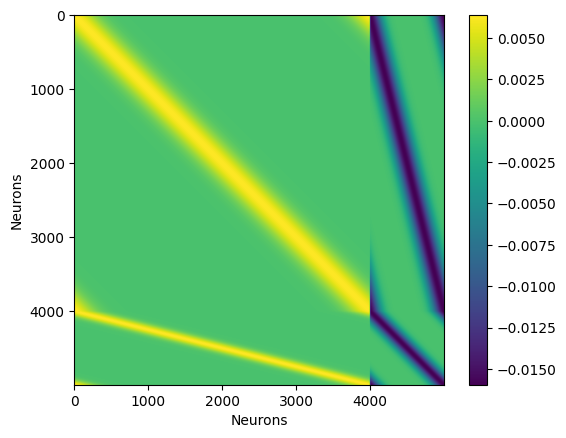

In [3]:
#生成网络连接权重
dist_list = calc_dist(params, dim = 1)
J = generate_net(params, dist_list)  
plt.imshow(J)
plt.colorbar()
plt.xlabel("Neurons")
plt.ylabel("Neurons")

In [57]:
eigs, eig_V = np.linalg.eig(J)
real_part = np.real(eigs)
imag_part = np.imag(eigs)
plt.scatter(real_part, imag_part, s=3, c='none', marker='o', edgecolors='k')
plt.axis('equal')
plt.xlabel(r"$Re(\lambda)$")
plt.ylabel(r"$Im(\lambda)$")


In [4]:
x = np.zeros((N_E+N_I,))
record_x = []
for step in trange(T*t_step):
    x *= np.exp(-1/t_step)
    x += J @ x * (1/t_step) + np.random.randn(N_E+N_I) * np.sqrt(1/t_step) 
    if step % record_step == 0:
        record_x.append(x.copy())
record_x = np.array(record_x)

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:14<00:00, 141.64it/s]


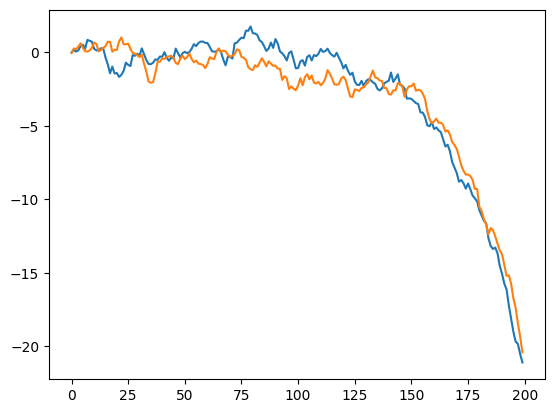

In [5]:
plt.plot(record_x[:,13])
plt.plot(record_x[:,14])

In [7]:
frames = []
for step in trange(int(np.floor(T*t_step//record_step))):
    fig, ax = plt.subplots()
    
    plt.plot(np.linspace(0,1,N_E), record_x[step,0:N_E],'ro',markersize=0.5,label='Exc.')
    plt.plot(np.linspace(0,1,N_I), record_x[step,N_E:N_E+N_I],'bo',markersize=0.5,label='Inh.')
    plt.plot(np.linspace(0,1,N_E),np.linspace(0,0,N_E),"k--")
    plt.xlabel("Location",fontsize=15)
    plt.ylabel("Activity",fontsize=15)
    plt.xticks([0,0.5,1],fontsize=15)
    plt.yticks([-10,0,10],fontsize=15)
    plt.legend(fontsize=15)
    plt.ylim((-10,10))
    
    
    # 保存当前帧
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(frame)
    
    # 关闭当前图表
    plt.close(fig)

# 将所有帧保存为一个GIF
imageio.mimsave('explode.gif', frames, duration=100)

100%|██████████| 200/200 [00:09<00:00, 20.27it/s]


In [32]:
#定义网络参数
T, t_step, record_step = 30, 100, 10

rescale = 725
N_E, N_I = 4000, 1000
conn_NEE, conn_NIE, conn_NEI, conn_NII = 400, 100, 400, 100
J_EE, J_IE, J_EI, J_II = 4/rescale, 4/rescale, -20/rescale, -20/rescale
sigma_EE, sigma_IE, sigma_EI, sigma_II = 0,0,0,0 #8/rescale, 8/rescale, 20/rescale, 20/rescale
d_EE, d_IE, d_EI, d_II = 0.05, 0.05, 0.1, 0.1
params = Network_Params(N_E = N_E, N_I = N_I,
    N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
    d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
    g_bar_EE = J_EE * conn_NEE, g_bar_EI = J_EI * conn_NEI, g_bar_IE = J_IE * conn_NIE, g_bar_II = J_II * conn_NII,
    g_EE = sigma_EE * np.sqrt(conn_NEE), g_EI = sigma_EI * np.sqrt(conn_NEI), g_IE = sigma_IE * np.sqrt(conn_NIE), g_II = sigma_II * np.sqrt(conn_NII)
    )

In [33]:
dist_list = calc_dist(params, dim = 1)
J = generate_field(params, dist_list)  

In [34]:
x = np.zeros((N_E+N_I,))
record_x = []
for step in trange(T*t_step):
    x *= np.exp(-1/t_step)
    x += J @ x * (1/t_step) + np.random.randn(N_E+N_I) * np.sqrt(1/t_step) 
    if step % record_step == 0:
        record_x.append(x.copy())
record_x = np.array(record_x)

100%|██████████| 3000/3000 [00:21<00:00, 140.85it/s]


In [35]:
frames = []
for step in trange(int(np.floor(T*t_step//record_step))):
    fig, ax = plt.subplots()
    
    plt.plot(np.linspace(0,1,N_E), record_x[step,0:N_E],'ro',markersize=0.5,label='Exc.')
    plt.plot(np.linspace(0,1,N_I), record_x[step,N_E:N_E+N_I],'bo',markersize=0.5,label='Inh.')
    plt.plot(np.linspace(0,1,N_E),np.linspace(0,0,N_E),"k--")
    plt.xlabel("Location",fontsize=15)
    plt.ylabel("Activity",fontsize=15)
    plt.xticks([0,0.5,1],fontsize=15)
    plt.yticks([-10,0,10],fontsize=15)
    plt.legend(fontsize=15)
    plt.ylim((-10,10))
    
    
    # 保存当前帧
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(frame)
    
    # 关闭当前图表
    plt.close(fig)

# 将所有帧保存为一个GIF
imageio.mimsave('no_explode.gif', frames, duration=100)

  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [00:13<00:00, 21.64it/s]


In [36]:
record_x_smoothed = []
for x in record_x:
    x_smoothed = np.convolve(x,np.ones((200,))/200)
    record_x_smoothed.append(x_smoothed)
record_x_smoothed = np.array(record_x_smoothed)

In [37]:
frames = []
for step in trange(int(np.floor(T*t_step//record_step))):
    fig, ax = plt.subplots()
    
    plt.plot(np.linspace(0,1,N_E), record_x_smoothed[step,0:N_E],'r-',label='Exc.')
    plt.plot(np.linspace(0,1,N_I), record_x_smoothed[step,N_E:N_E+N_I],'b-',label='Inh.')
    plt.plot(np.linspace(0,1,N_E),np.linspace(0,0,N_E),"k--")
    plt.xlabel("Location",fontsize=15)
    plt.ylabel("Activity",fontsize=15)
    plt.xticks([0,0.5,1],fontsize=15)
    plt.yticks([-1,0,1],fontsize=15)
    plt.legend(fontsize=15)
    plt.ylim((-1,1))
    
    
    # 保存当前帧
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(frame)
    
    # 关闭当前图表
    plt.close(fig)

# 将所有帧保存为一个GIF
imageio.mimsave('no_explode_smoothed.gif', frames, duration=100)

100%|██████████| 300/300 [00:13<00:00, 21.60it/s]


In [38]:
#定义网络参数
T, t_step, record_step = 20, 100, 10

rescale = 500
N_E, N_I = 4000, 1000
conn_NEE, conn_NIE, conn_NEI, conn_NII = 400, 100, 400, 100
J_EE, J_IE, J_EI, J_II = 4/rescale, 4/rescale, -20/rescale, -20/rescale
sigma_EE, sigma_IE, sigma_EI, sigma_II = 0,0,0,0 #8/rescale, 8/rescale, 20/rescale, 20/rescale
d_EE, d_IE, d_EI, d_II = 0.05, 0.05, 0.1, 0.1
params = Network_Params(N_E = N_E, N_I = N_I,
    N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
    d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
    g_bar_EE = J_EE * conn_NEE, g_bar_EI = J_EI * conn_NEI, g_bar_IE = J_IE * conn_NIE, g_bar_II = J_II * conn_NII,
    g_EE = sigma_EE * np.sqrt(conn_NEE), g_EI = sigma_EI * np.sqrt(conn_NEI), g_IE = sigma_IE * np.sqrt(conn_NIE), g_II = sigma_II * np.sqrt(conn_NII)
    )

In [39]:
dist_list = calc_dist(params, dim = 1)
J = generate_field(params, dist_list) 

In [42]:
def activation_func(x):
    largest_firing_rate = 3
    return np.minimum(largest_firing_rate, np.maximum(x, -largest_firing_rate))

x = np.zeros((N_E+N_I,))
record_x = []
for step in trange(T*t_step):
    x *= np.exp(-1/t_step)
    x += J @ activation_func(x) * (1/t_step) + np.random.randn(N_E+N_I) * np.sqrt(1/t_step) 
    if step % record_step == 0:
        record_x.append(x.copy())
record_x = np.array(record_x)

100%|██████████| 2000/2000 [00:14<00:00, 134.89it/s]


In [43]:
frames = []
for step in trange(int(np.floor(T*t_step//record_step))):
    fig, ax = plt.subplots()
    
    plt.plot(np.linspace(0,1,N_E), record_x[step,0:N_E],'ro',markersize=0.5,label='Exc.')
    plt.plot(np.linspace(0,1,N_I), record_x[step,N_E:N_E+N_I],'bo',markersize=0.5,label='Inh.')
    plt.plot(np.linspace(0,1,N_E),np.linspace(0,0,N_E),"k--")
    plt.xlabel("Location",fontsize=15)
    plt.ylabel("Activity",fontsize=15)
    plt.xticks([0,0.5,1],fontsize=15)
    plt.yticks([-10,0,10],fontsize=15)
    plt.legend(fontsize=15)
    plt.ylim((-10,10))
    
    
    # 保存当前帧
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(frame)
    
    # 关闭当前图表
    plt.close(fig)

# 将所有帧保存为一个GIF
imageio.mimsave('explode_rectified.gif', frames, duration=100)

100%|██████████| 200/200 [00:10<00:00, 19.48it/s]


In [44]:
def activation_func(x):
    largest_firing_rate = 3
    return largest_firing_rate*np.tanh(x/largest_firing_rate)

x = np.zeros((N_E+N_I,))
record_x = []
for step in trange(T*t_step):
    x *= np.exp(-1/t_step)
    x += J @ activation_func(x) * (1/t_step) + np.random.randn(N_E+N_I) * np.sqrt(1/t_step) 
    if step % record_step == 0:
        record_x.append(x.copy())
record_x = np.array(record_x)

100%|██████████| 2000/2000 [00:14<00:00, 135.69it/s]


In [45]:
frames = []
for step in trange(int(np.floor(T*t_step//record_step))):
    fig, ax = plt.subplots()
    
    plt.plot(np.linspace(0,1,N_E), record_x[step,0:N_E],'ro',markersize=0.5,label='Exc.')
    plt.plot(np.linspace(0,1,N_I), record_x[step,N_E:N_E+N_I],'bo',markersize=0.5,label='Inh.')
    plt.plot(np.linspace(0,1,N_E),np.linspace(0,0,N_E),"k--")
    plt.xlabel("Location",fontsize=15)
    plt.ylabel("Activity",fontsize=15)
    plt.xticks([0,0.5,1],fontsize=15)
    plt.yticks([-10,0,10],fontsize=15)
    plt.legend(fontsize=15)
    plt.ylim((-10,10))
    
    
    # 保存当前帧
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(frame)
    
    # 关闭当前图表
    plt.close(fig)

# 将所有帧保存为一个GIF
imageio.mimsave('explode_tanh.gif', frames, duration=100)

100%|██████████| 200/200 [00:09<00:00, 20.79it/s]
